# Cell 1 – Title & intro (Markdown)

# Hierarchical Clustering (Agglomerative) on a Small Synthetic Dataset

In this notebook I:

1. Generate a tiny 2D synthetic dataset with 3 natural clusters.
2. Apply **hierarchical agglomerative clustering** using scikit-learn:
   - different linkage methods (`"ward"`, `"complete"`, `"average"`)
3. Visualize:
   - the dendrogram (cluster merge tree)
   - the final cluster assignments in 2D

This complements the previous K-Means-from-scratch notebook by using a different clustering approach that builds a hierarchy of clusters instead of fixing `k` from the start.




# Cell 2 – Install & imports

In [1]:
# SciPy is usually available in Colab, but we ensure it's there
!pip -q install scipy

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage


# Cell 3 – Generate small synthetic dataset

Data shape: (120, 2)


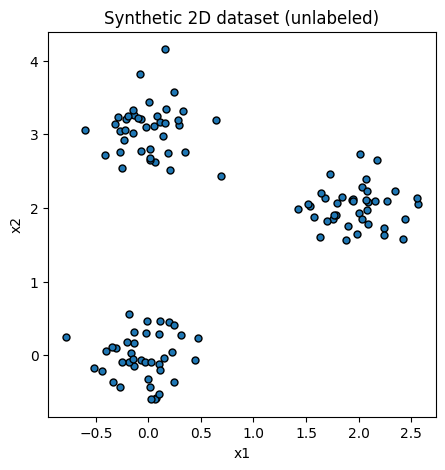

In [2]:
np.random.seed(42)

# 3 small 2D blobs
n_points = 40  # per cluster (small & fast)
cluster1 = np.random.normal(loc=[0, 0], scale=0.3, size=(n_points, 2))
cluster2 = np.random.normal(loc=[2, 2], scale=0.3, size=(n_points, 2))
cluster3 = np.random.normal(loc=[0, 3], scale=0.3, size=(n_points, 2))

X = np.vstack([cluster1, cluster2, cluster3])

print("Data shape:", X.shape)

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], s=25, edgecolor="k")
plt.title("Synthetic 2D dataset (unlabeled)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


# Cell 4 – Short explanation of hierarchical clustering (Markdown)

## What is Hierarchical (Agglomerative) Clustering?

Hierarchical clustering builds a **tree of clusters** (a hierarchy), instead of directly giving you a fixed number of clusters.

In **agglomerative clustering** (bottom-up):

1. Start with each point as its own cluster.
2. Repeatedly merge the **two closest clusters** according to a linkage rule:
   - **ward**: minimizes increase in total within-cluster variance
   - **complete**: distance between the two *farthest* points in the clusters
   - **average**: distance between the *average* of all pairs of points
3. Continue until all points are merged into a single cluster.

We can visualize this process using a **dendrogram**, and choose a cut level (horizontal line) to decide the final number of clusters.


#Cell 5 – Dendrogram with SciPy

We’ll use SciPy’s linkage + dendrogram to see the hierarchy.

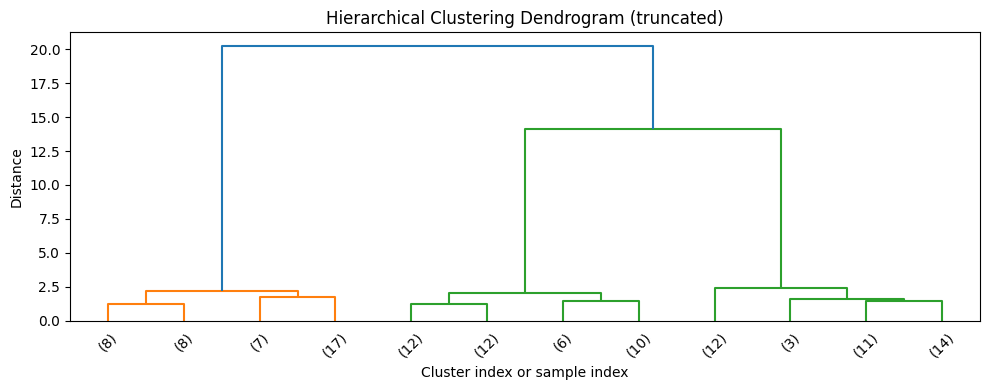

In [3]:
# Compute the linkage matrix for the dendrogram.
# "ward" works well for Euclidean distance on numeric data.
Z = linkage(X, method="ward")  # you can try "complete", "average", etc.

plt.figure(figsize=(10, 4))
dendrogram(Z, truncate_mode="lastp", p=12, leaf_rotation=45., leaf_font_size=10.)
plt.title("Hierarchical Clustering Dendrogram (truncated)")
plt.xlabel("Cluster index or sample index")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()


#Cell 6 – AgglomerativeClustering (Ward)

 Now we use scikit-learn to actually assign cluster labels.

Cluster counts: [40 40 40]
Silhouette score (ward): 0.7847


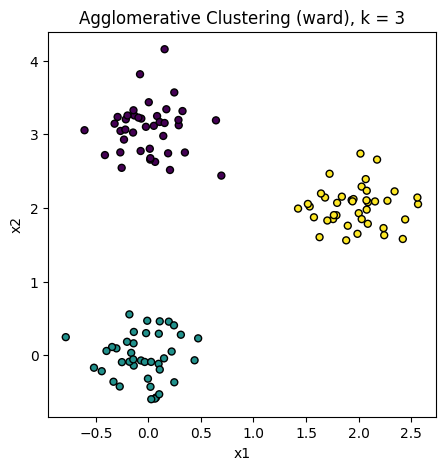

In [5]:
from sklearn.cluster import AgglomerativeClustering

k = 3

agg_ward = AgglomerativeClustering(
    n_clusters=k,
    metric="euclidean",    # replaces affinity
    linkage="ward"         # ward only works with euclidean
)
labels_ward = agg_ward.fit_predict(X)

print("Cluster counts:", np.bincount(labels_ward))
sil_ward = silhouette_score(X, labels_ward)
print("Silhouette score (ward):", round(sil_ward, 4))

plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=labels_ward, cmap="viridis", s=25, edgecolor="k")
plt.title(f"Agglomerative Clustering (ward), k = {k}")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


# Cell 7 – Try different linkages (complete, average)

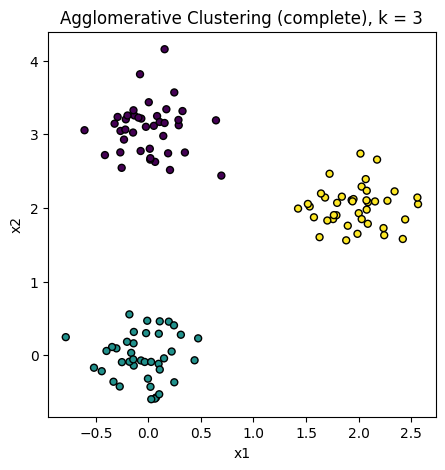

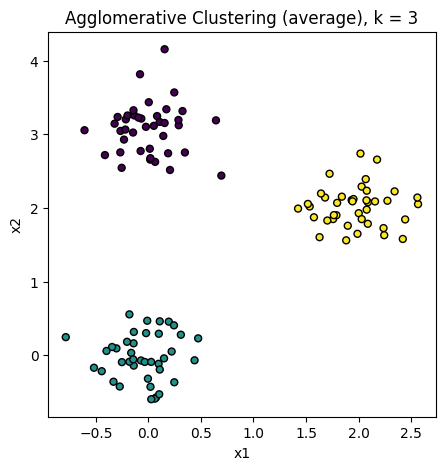

Silhouette scores by linkage:
complete: 0.7847
average : 0.7847


In [7]:
results = {}

for linkage_method in ["complete", "average"]:
    agg = AgglomerativeClustering(
        n_clusters=k,
        metric="euclidean",        # replaces affinity
        linkage=linkage_method
    )
    labels = agg.fit_predict(X)
    sil = silhouette_score(X, labels)
    results[linkage_method] = sil

    plt.figure(figsize=(5,5))
    plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis", s=25, edgecolor="k")
    plt.title(f"Agglomerative Clustering ({linkage_method}), k = {k}")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

print("Silhouette scores by linkage:")
for m, s in results.items():
    print(f"{m:8s}: {s:.4f}")


# Cell 8 – Summary (Markdown)

## Summary

In this notebook, I:

- Generated a **small 2D synthetic dataset** with 3 clusters.
- Used **hierarchical agglomerative clustering** (`AgglomerativeClustering`) from scikit-learn:
  - Explored different `linkage` methods: `ward`, `complete`, `average`.
- Plotted a **dendrogram** using `scipy.cluster.hierarchy.linkage` and `dendrogram` to visualize how clusters are merged step-by-step.
- Chose `k = 3` clusters and computed the **silhouette score** to evaluate clustering quality.
- Compared the visual appearance and scores for the different linkage strategies.
